<a href="https://colab.research.google.com/github/Nayr91/Codecademy/blob/master/foodwheel_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Board Slides for FoodWheel
***

![food_image.jpg](attachment:food_image.jpg)

FoodWheel is a startup delivery service that takes away the struggle of deciding where to eat! FoodWheel picks you an amazing local restaurant and lets you order through the app. Senior leadership is getting ready for a big board meeting, and as the resident Data Analyst, you have been enlisted to help decipher data and create a presentation to answer several key questions:

What cuisines does FoodWheel offer? Which areas should the company search for more restaurants to partner with?
How has the average order amount changed over time? What does this say about the trajectory of the company?
How much has each customer on FoodWheel spent over the past six months? What can this tell us about the average FoodWheel customer?

Over this project, you will analyze several DataFrames and create several visualizations to help answer these questions.

## Project Requirements

1. Before we begin analyzing our data, we need to import two Python packages. To be able to load in and inspect our datasets, we must first import the pandas package. We will also need to create visualizations to help us analyze the data. This requires us to import pyplot, a subset of the Matplotlib package.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



## Cuisine Offerings

2. Now that we have imported the pandas package, we can begin looking at our data. Load and inspect the restaurant data from `restaurants.csv` into a DataFrame called `restaurants`.


In [4]:
restaurants = pd.read_csv('restaurants.csv')
restaurants.head()

,id,name,neighborhood,cuisine
0,1,Jongro BBQ,Midtown,Korean
1,2,Pocha 32,Midtown,Korean
2,3,Nom Wah Tea Parlor,Chinatown,Chinese
3,4,Roberta’s,Brooklyn,Pizza
4,5,Speedy Romeo,Brooklyn,Pizza


3. Now that we have our data loaded in and inspected, we can start to ask some questions about the data. Suppose we wanted to know how many different types of cuisine FoodWheel offers and how many different restaurants serve that type of cuisine. Print out your answers to both questions.

In [5]:
print(restaurants.cuisine.nunique())
name_cuisine = restaurants.groupby('cuisine').name.count()
print(name_cuisine)

7
cuisine
American      10
Chinese       11
Italian        8
Japanese       4
Korean         3
Pizza          4
Vegetarian     4
Name: name, dtype: int64


4. The board wants to make sure that FoodWheel offers a wide variety of restaurants. Having many different options makes customers more likely to come back. Create a pie chart that shows the different types of cuisines available on FoodWheel.


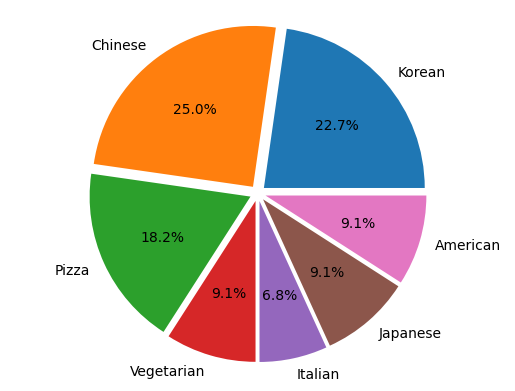

In [140]:
gaps = [0.1 for i in range(0,7)]
plt.pie(name_cuisine,
        labels = restaurants.cuisine.unique(),
        autopct='%1.1f%%',
        explode=gaps,
        radius=2)
plt.axis('equal')
plt.show()

## Order Price Over Time

5. FoodWheel is a relatively new start-up.  They launched one year ago and have grown more popular since then.  Management suspects that the average amount spent on each order has increased over time.


In [7]:
orders = pd.read_csv('orders.csv')
orders.head()

,id,customer_id,date,price
0,1,61,6-18-2017,13.0
1,2,210,5-8-2017,21.0
2,3,0,9-7-2017,33.0
3,4,66,7-7-2017,19.0
4,5,65,4-26-2017,13.0


6. Perhaps tracking the orders made per month can help us determine a trend. Group the `orders` data by month.


In [8]:
orders['month'] = orders.date.str.split('-', expand=True)[0]
print(orders.head())

   id  customer_id       date  price month
0   1           61  6-18-2017   13.0     6
1   2          210   5-8-2017   21.0     5
2   3            0   9-7-2017   33.0     9
3   4           66   7-7-2017   19.0     7
4   5           65  4-26-2017   13.0     4


7. While we are interested in the average order amount spent each month (average price), it wouldn't hurt to include the standard deviation as well. Calculate the average and standard deviation of the amount spent per month (`price`) and store each as its own separate variable.



In [9]:
avg_order = orders.groupby('month').price.mean()
std_orders = orders.groupby('month').price.std()
print(avg_order.head())
print(std_orders)

month
4     9.609195
5    14.858824
6    15.152174
7    18.012821
8    21.150685
Name: price, dtype: float64
month
4    2.562504
5    3.395210
6    2.835934
7    2.848985
8    4.455556
9    4.518806
Name: price, dtype: float64


8. At last, we can now visualize our data. Create a bar plot that demonstrates the trend in average order size over time. Make sure to include the following information:

     -The height of each bar should come from the `price` field from your DataFrame in step 7 (`avg_order`).
     
     -Use the standard deviations from step 7 (`std_order`) as the `yerr`.
     
     -The error capsize should be 5.
     
     -Make sure that you label each bar with the name of the month (i.e., 4 = April).
     
     -Also be sure to label the y-axis.
     
     -Give your plot a descriptive title.


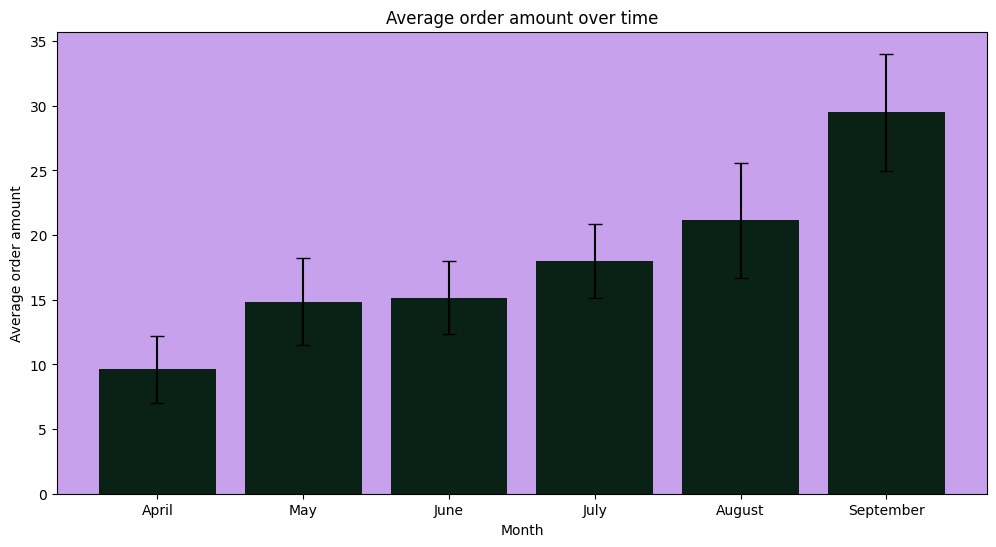

<Figure size 640x480 with 0 Axes>

In [69]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 1, 1)
month_labels = ['April', 'May', 'June', 'July', 'August', 'September']
month_list = list(orders.month.unique())
month_list.sort()
ax1.bar(month_list,
        avg_order,
        yerr = std_orders,
        capsize=5,
        color = '#092215')
ax1.set_facecolor('#c8a1ed')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average order amount')
ax1.set_title('Average order amount over time')
ax1.set_xticks([0,1,2,3,4,5],
               labels = month_labels)
plt.show()
plt.clf()

## Customer Orders

9. There is a range of amounts that customers spend at FoodWheel. Create a `customer_amount` DataFrame that stores each customer and how much they order.

    **Hint:**
    
    Start by grouping `orders` by `customer_id` and calculating the total amount spent by each customer.  Save your results to `customer_amount`.


In [60]:
customer_amount = orders.groupby('customer_id').sum()
customer_amount.reset_index(inplace=True)
print(customer_amount)

     customer_id    id  price
0              0   605   83.0
1              2   302   11.0
2              3   967   65.0
3              4   168   32.0
4              5  2137  119.0
..           ...   ...    ...
219          245  1067   68.0
220          246   481   16.0
221          247   274   35.0
222          248  1229   89.0
223          249   501   27.0

[224 rows x 3 columns]


<ipython-input-60-e3c601cbbb83>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_amount = orders.groupby('customer_id').sum()


10. Create a histogram of the amount spent by each customer over the past six months with the following format:

     -The range should be from 0 to 200
     
     -The number of bins should be 40
     
     -Label the x-axis `Total Spent`
     
     -Label the y-axis `Number of Customers`
     
     -Add a title

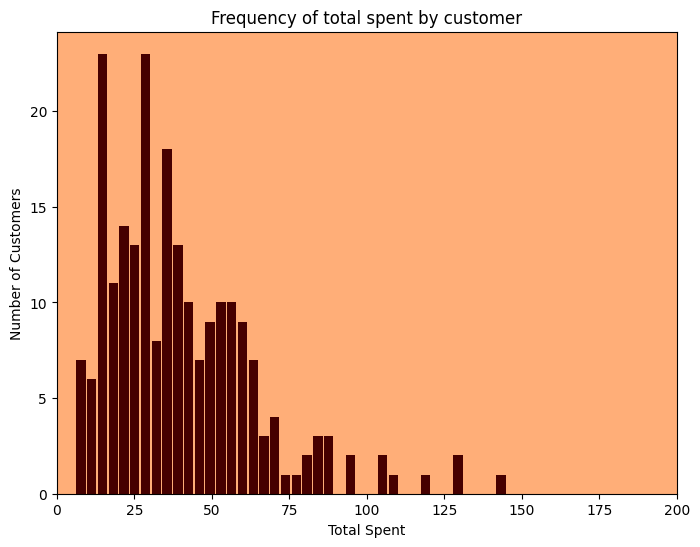

<Figure size 640x480 with 0 Axes>

In [71]:

fig = plt.figure(figsize=(8, 6))
ax2 = fig.add_subplot(1, 1, 1)
plt.hist(customer_amount.price,
         bins = 40,
         color = '#460000',
         rwidth=0.87)
ax2.set_facecolor('#ffae78')
plt.xlim(0, 200)
plt.xlabel('Total Spent')
plt.ylabel('Number of Customers')
plt.title('Frequency of total spent by customer')
plt.show()
plt.clf()

### Congratulations!!

The team loves your analysis, and plan to use the information you have gathered to make beneficial decisions for the company and community. There is an additional task of adding the links for each of the paintings to the main list. This task can be considered a challenge that does not need to be completed to move on to the next section.

### Extra Challenge

After a great round of applause, a member of the senior leadership board would quickly like to see the neighborhoods that have the most restaurants.

Create a visualization to display the restaurant count for each neighborhood.

neighborhood
Brooklyn     10
Chinatown     7
Downtown     14
Midtown       8
Queens        1
UWS           1
Uptown        3
dtype: int64


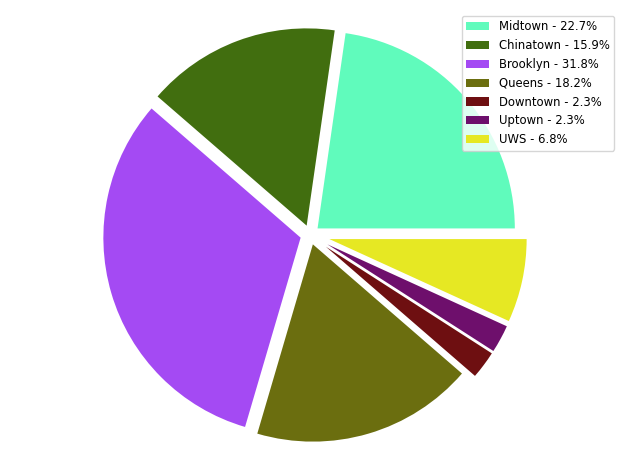

<Figure size 640x480 with 0 Axes>

In [171]:
area_counts = restaurants.groupby('neighborhood').size()
print(area_counts)
seg_colours = ['#60FBBC','#416E0F',  '#A44AF3', '#6B6E0F', '#6E0F11', '#6E0F6C', '#E6E823']
zip_labels = zip(list(restaurants.neighborhood.unique()), [round((i/area_counts.sum())*100, 1) for i in area_counts])
legend_labels = [f'{i[0]} - {i[1]}%' for i in zip_labels]
plt.pie(area_counts,
        explode=[0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2],
        radius=2,
        colors=seg_colours)
plt.axis('equal')
plt.tight_layout()
plt.legend(legend_labels, fontsize='small')
plt.show()
plt.clf()